# Assignment 2

In [377]:
from matplotlib import pyplot as plt
import numpy as np
import math
import random

# 1. a)

Random points are generated in a unit circle using rejection method.

In [378]:
# Generating random x-coordinates:
arrayX = []
for i in range(2000):
    arrayX.append(random.uniform(-1,1))
    
# Generating random y-cooridnates:
arrayY = []
for i in range(2000):
    arrayY.append(random.uniform(-1,1))

# Forming pairs:
pairs = []
for i in range(len(arrayX)):
    x = arrayX[i]
    y = arrayY[i]
    pairs.append((x,y))  

circ_X = []
circ_Y = []
for (x,y) in pairs:
    if x**2 + y**2 <= 1:
        circ_X.append(x)
        circ_Y.append(y)

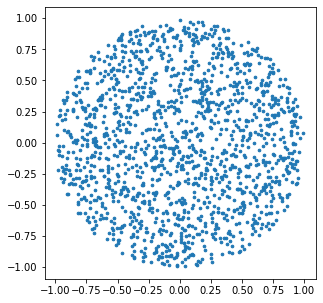

In [379]:
# Plotting:
x = circ_X
y = circ_Y
fig = plt.figure()

plt.axes().set_aspect('equal')
plt.scatter(x,y, s=7)
plt.show()

# 1. b)

Random points are generated in a unit circle using a coordinate transformation. The radius is drawn from Unif(0,1) whereas $\theta$ is drawn from Unif(0, $2\pi$).

The transformations are:

\begin{align}
x & = r\text{cos}\theta, \\
y & = r\text{sin}\theta. \\
\end{align}

In [380]:
# Generating random r-coordinates:
array_r = []
for i in range(2000):
    array_r.append(random.uniform(0,1))
    
# Generating random theta-cooridnates:
array_theta = []
for i in range(2000):
    array_theta.append(random.uniform(0,2*np.pi))
    
# Transformation:
array_x = []
array_y = []
for i in range(2000):
    array_x.append(array_r[i]*np.cos(2*np.pi*array_theta[i]))
    array_y.append(array_r[i]*np.sin(2*np.pi*array_theta[i]))

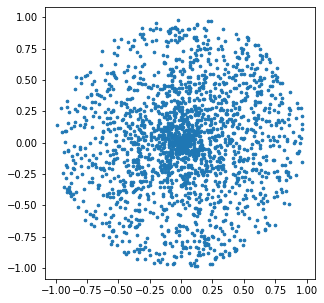

In [381]:
# Plotting:
x = array_x
y = array_y
fig = plt.figure()

plt.axes().set_aspect('equal')
plt.scatter(x,y,s=7)
plt.show()

We can see that with this coordinate transformation approach, the distribution inside the unit circle is not perfectly uniform. The density of points is much higher around the center of the circle and the density decreases towards the outer endge. This effect is due to the fact that each radius is now equally likely. Since at small radii the perimeters are smaller, the points are more densely packed at those smaller radii. All radii have roughly equally many points but the perimeters are different which make the density of points change as we move away from the center.

## 1. c)

Now we sample from the uniform distribution in a unit circle by using the inverse sampling approach.

We have a PDF: $f(r) = C2\pi r$. Threfore, the CDF is

\begin{equation}
    F(r) = \int_{0}^{r}C2\pi t \text{d} t = C\pi r^2.
\end{equation}

The constant $C$ is

\begin{equation}
    F(R) = \int_{0}^{R}C2\pi r \text{d} r = C\pi R^2 = 1 \Leftrightarrow C = \frac{1}{\pi R^2}.
\end{equation}

Thus, the CDF becomes

\begin{equation}
    F(r) = r^2/R^2.
\end{equation}

Let's deonte $F(r) = y$ which implies that $r = F^{-1}(y)$. We get

\begin{equation}
    r = R\sqrt{y} = F^{-1}(y).
\end{equation}

So, the task is to sample $y$ from Unif(0,1) and then transform it to $r$ with the formula above. This way the $r$'s are smapled from the uniform distribution in the unit circle.

In [382]:
# Generating random theta-cooridnates:
array_theta = []
for i in range(2000):
    array_theta.append(random.uniform(0,2*np.pi))
    
# Unif(0,1):
array_unif = []
for i in range(2000):
    array_unif.append(random.uniform(0,1))
       
# Generating the radius:
array_r = []
for i in range(2000):
    array_r.append(np.sqrt(array_unif[i]))
    
# Transformation:
array_x = []
array_y = []
for i in range(2000):
    array_x.append(array_r[i]*np.cos(2*np.pi*array_theta[i]))
    array_y.append(array_r[i]*np.sin(2*np.pi*array_theta[i]))

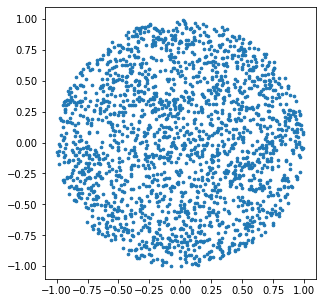

In [383]:
# Plotting:
x = array_x
y = array_y
fig = plt.figure()

plt.axes().set_aspect('equal')
plt.scatter(x,y,s=7)
plt.show()

We see that the distribution looks much more uniform than in b). The points are randomly yet uniformaly scatter around the unit cirle. This also slightly better than the distribution in a) because this time we didn't need to reject any samples and all of them ended up being useful.

## 2. a)

Here, the random points in a unit circle are generated with the inverse sampling approach.

We have a PDF: $f(x) = CAx^{\alpha}$, where $A=10^4$ and $\alpha = -3/2$. We get the constant C by integrating

\begin{equation}
    \int_{1}^{\infty}CAx^{\alpha}dx = 1.
\end{equation}

We get $C = 5\times 10^{-5}$. Next, we calculate the CDF:

\begin{equation}
    F(x) = \int_{1}^{x}CAt^{\alpha}dt = 2CA(1-1/\sqrt{x}).
\end{equation}

Let's denote $F(x) = y$ which implies that $x  = F^{-1}(y)$. We obtain

\begin{equation}
    x = \frac{1}{(1-\frac{y}{2CA})^2} = F^{-1}(y).
\end{equation}

To sample from the power-law distribution, we draw $y$ from Unif(0,1) and compute $x$ with the expression above. 

In [384]:
A = 10**(4)
C = 5*10**(-5)

# Unif(0,1):
array_unif = []
for i in range(10**5):
    array_unif.append(random.random())
    
# Generating the x-values:
xs = []
for i in range(10**5):
    u = array_unif[i]
    x_new = 1/(1-(u/2/A/C))**2 #/2/C/A))**2
    xs.append(x_new)

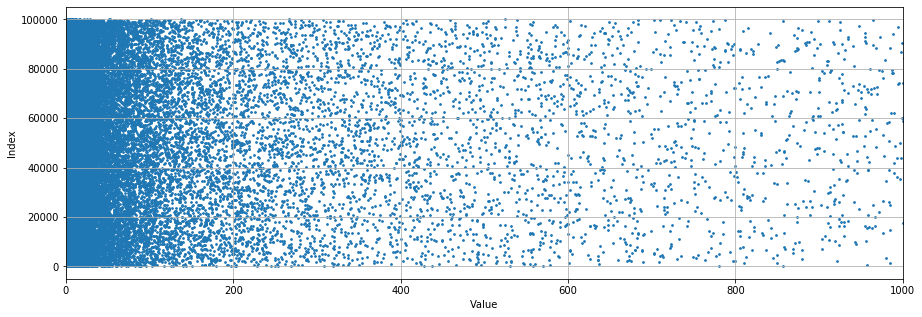

In [395]:
# Plotting:
plt.rcParams["figure.figsize"] = (15,5)

Y = []
for i in range(len(xs)):
    Y.append(i)
    
fig = plt.figure()

plt.xlim(0, 1000)
plt.scatter(xs, Y,s=3)
plt.grid(True)
plt.xlabel('Value')
plt.ylabel('Index')
plt.show()

Here, we can see how points close to zero are much more likely than the points further right. This seems like a power-law distribution.

## 2. b)

Here, linear binning is done using Python's histogram function.

In [386]:
histog = plt.hist(xs, bins=300, range=(0,1000))
plt.close()

values = histog[0]
coords = histog[1]

avgs = []
for i in range(len(coords)-1):
    avgs.append(0.5*(coords[i]+coords[i+1]))

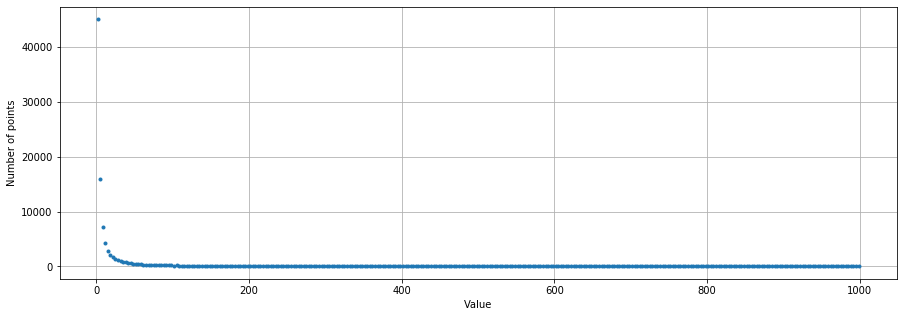

In [396]:
# Plotting
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(avgs, values, '.')
plt.grid(True)
plt.xlabel('Value')
plt.ylabel('Number of points')
plt.show()

Bins are located and sized evenly which is why there aren't sufficiently many bins near zero where the most interesting behavior occurs. This figure is plotted with linear axes.

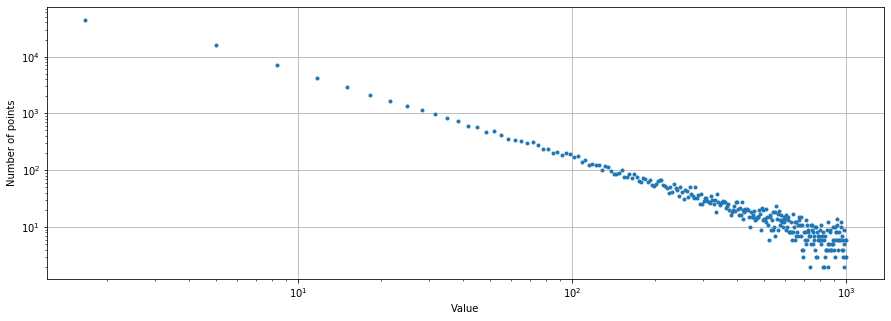

In [397]:
# Plotting
plt.rcParams["figure.figsize"] = (15,5)
plt.loglog(avgs, values, '.')
plt.grid(True)
plt.xlabel('Value')
plt.ylabel('Number of points')
plt.show()

The figure above shows a log-log plot of the same data. The data roughly forms a straigt line which was expected for such an exponential distribution. However, again the linear binning isn't quite appropriate. Too few bins are located at small values. In this log-log plot, the bins are too unevenly spaced and sized.

## 2. c)

Here, we use logarithmic binning for the same sampled data.

In [389]:
# Logarithmic binning:
R = 100
r = 10

R_list = range(-R, R+1, 1)

coords_log = []
for i in R_list:
    pair = (math.exp((i-1)/r), math.exp(i/r))
    coords_log.append(pair)

In [390]:
# Number of points in the bins:
N = np.zeros(len(coords_log))
for i in range(len(coords_log)):
    pair = coords_log[i]
    for x in xs:
        if x > pair[0] and x < pair[1]:
            N[i] = N[i] + 1

In [391]:
# Bin averages:
avgs_log = []
for i in range(len(coords_log)):
    avgs_log.append(0.5*(coords_log[i][0]+coords_log[i][1]))

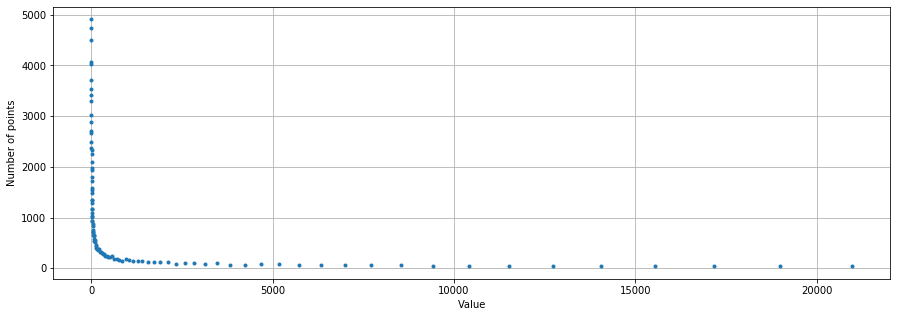

In [398]:
# Removing zeros:
num_zeros = 0
for n in N:
    if n == 0:
        num_zeros = num_zeros + 1
    else:
        break

avgs_log = avgs_log[num_zeros:]
N = N[num_zeros:]

# Plotting:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(avgs_log,N,'.')
plt.grid(True)
plt.xlabel('Value')
plt.ylabel('Number of points')
plt.show()

It is clear that with logarithmic binning, the bins are more densely packed at small values. This allows us to see the interesting behavior there.

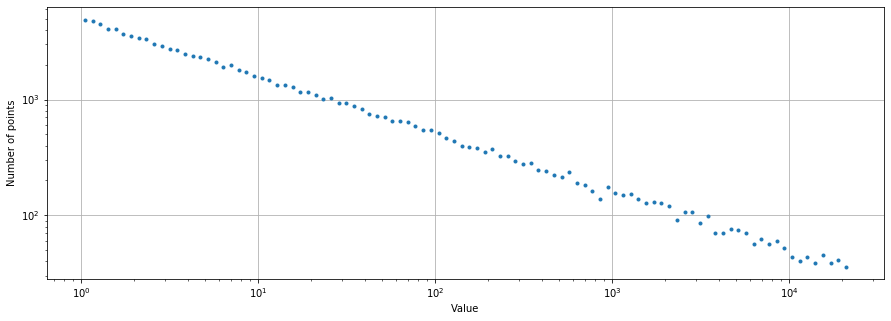

In [399]:
# Plotting:
plt.rcParams["figure.figsize"] = (15,5)
plt.loglog(avgs_log,N,'.')
plt.grid(True)
plt.xlabel('Value')
plt.ylabel('Number of points')
plt.show()

The figure above shows a log-log plot of the same logarithmically binned data. This time the bins are evenly located and the overall trend is easy to see. As expected a straight line is formed.